<a href="https://colab.research.google.com/github/HarshSinha-1/MachineLearning/blob/main/optimizer_GD_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [ ]:
# Generate random regression dataset
X, y = make_regression(n_samples=500, n_features=1, noise=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Add bias term to features
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

In [ ]:
# Loss function: Mean Squared Error (MSE)
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


In [ ]:
# Gradient of the loss function
def gradient(X, y_true, weights):
    n = len(y_true)
    y_pred = np.dot(X, weights)
    grad = -2 / n * np.dot(X.T, (y_true - y_pred))
    return grad

In [ ]:
# Initialize parameters
weights_gd = np.zeros(X_train.shape[1])
weights_sgd = np.zeros(X_train.shape[1])

In [ ]:
# Hyperparameters
learning_rate = 0.01
num_epochs = 100
batch_size = 32

In [ ]:
# To store losses for visualization
loss_gd = []
loss_sgd = []

In [ ]:
# Gradient Descent (GD)
for epoch in range(num_epochs):
    grad_gd = gradient(X_train, y_train, weights_gd)
    weights_gd -= learning_rate * grad_gd
    y_pred_gd = np.dot(X_train, weights_gd)
    loss_gd.append(mse_loss(y_train, y_pred_gd))

In [ ]:
# Stochastic Gradient Descent (SGD)
for epoch in range(num_epochs):
    indices = np.random.permutation(len(y_train))
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]
    for i in range(0, len(y_train), batch_size):
        X_batch = X_train_shuffled[i:i + batch_size]
        y_batch = y_train_shuffled[i:i + batch_size]
        grad_sgd = gradient(X_batch, y_batch, weights_sgd)
        weights_sgd -= learning_rate * grad_sgd
    y_pred_sgd = np.dot(X_train, weights_sgd)
    loss_sgd.append(mse_loss(y_train, y_pred_sgd))

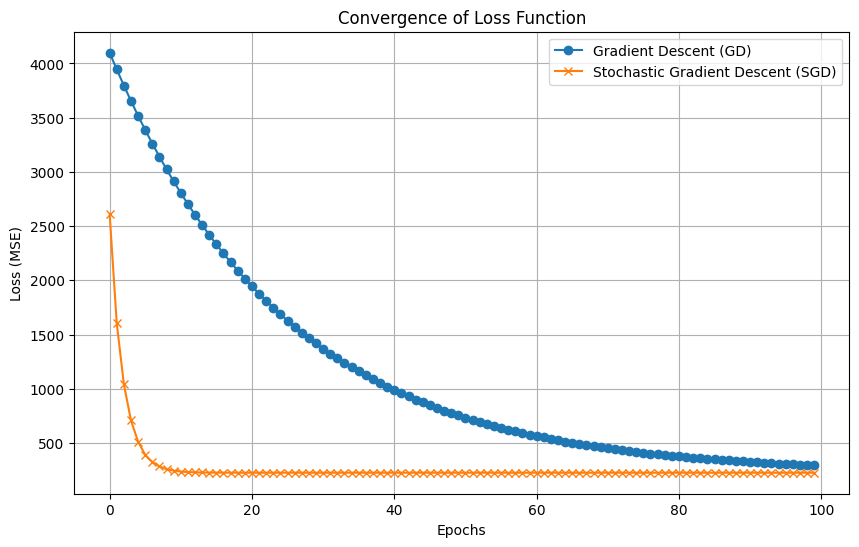

In [ ]:

   # Visualization of convergence
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), loss_gd, label='Gradient Descent (GD)', marker='o')
plt.plot(range(num_epochs), loss_sgd, label='Stochastic Gradient Descent (SGD)', marker='x')
plt.title('Convergence of Loss Function')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Display final losses
print("Final Losses:")
print("Gradient Descent (GD):", loss_gd[-1])
print("Stochastic Gradient Descent (SGD):", loss_sgd[-1])

Final Losses:
Gradient Descent (GD): 295.03390166952596
Stochastic Gradient Descent (SGD): 225.67015786608408


**GD**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
x1 = np.random.randint(low=1,high=20,size=20000)
x2 = np.random.randint(low=1,high=20,size=20000)
y = 3+2*x1-4*x2+np.random.randint(20000)

In [ ]:
x = pd.DataFrame({'intercept':np.ones(20000),'x1':x1,'x2':x2})

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
sk_model = LinearRegression()

In [ ]:
sk_model.fit(pd.DataFrame({'x1':x1,'x2':x2}),y)

LinearRegression()

In [ ]:
sk_w = [sk_model.intercept_]+list(sk_model.coef_)

In [ ]:
sk_w

[2511.0, 1.9999999999999987, -4.000000000000002]

In [ ]:
w = np.random.random(x.shape[1])

In [ ]:
w

array([0.3414405 , 0.56328202, 0.13077557])

In [ ]:
def my_pred(x,w):
  return x@w
  return pred

In [ ]:
def my_error(y,x,w):
  error = y-my_pred(x,w)
  return error

In [ ]:
def my_cost(y,w,x):
  error=my_error(y,x,w)
  cost = error.T@error
  return cost

In [ ]:
def grad(y,x,w):
  error = my_error(y,x,w)
  grad=0
  grad-=x.T@error/x.shape[0]
  return np.array(grad)

In [ ]:
grad(y,x,w)

array([ -2483.46003029, -24719.31934564, -24809.07536544])

In [ ]:
def lr_grad(y,x,learning_rate,num_step):
  wts=np.random.random(x.shape[1])

  for i in  range(num_step):
    wts-=learning_rate*grad(y,x,wts)

    if i%100==0:
      print(my_cost(y,wts,x),wts)

In [ ]:
cost_gd,w_gd=lr_grad(y,x,0.001,1000)

In [ ]:
sk_w

[2511.0, 1.9999999999999987, -4.000000000000002]

In [ ]:
w_gd

array([312.02840906,  94.0218376 ,  83.5094258 ])

SGD(stochastic gradient decent)

In [ ]:
def lr_grad2(y,x,learning_rate,num_step):
  wts=np.random.random(x.shape[1])
  cost=[]

  for i in  range(num_step):
    rand_inp=np.random.choice(range(x.shape[0]),10)
    y_sub=y[rand_inp]
    x_sub=x.iloc[rand_inp]

    wts-=learning_rate*grad(y_sub,x_sub,wts)
    cost.append(my_cost(y,wts,x))

  return cost,wts

In [ ]:
cost_sgd,w_sgd=lr_grad2(y,x,0.001,1000)

In [ ]:
w_sgd

array([310.4243438 ,  96.54560524,  86.80274999])

In [ ]:
cost_sgd

[74626246235.29164,
 52473282533.44551,
 37967370242.22208,
 28417468995.33738,
 23941064966.196793,
 20566927164.96765,
 18244736017.35286,
 17005110905.504843,
 16544701829.10653,
 16514609435.139557,
 16445014213.735445,
 16228792542.734911,
 16385284726.953888,
 16270213728.060297,
 16139589113.940222,
 16141284331.716808,
 16656971785.915146,
 16532368070.983389,
 16628415194.63462,
 16394861612.493677,
 16274015623.67366,
 16397936734.296415,
 16234791121.481394,
 16118605243.982098,
 16335025670.89468,
 16233591303.472382,
 16791143717.082771,
 16235025494.25124,
 16222433179.82233,
 16089986682.872822,
 16117614472.833675,
 16531786721.824963,
 16137003789.45531,
 16271447278.946104,
 16319494498.191631,
 16350760543.311466,
 16084057845.704178,
 16089432700.788698,
 16049242227.53484,
 16056816303.56136,
 16162836024.068985,
 16054689267.555222,
 16096603580.693647,
 16027706194.707233,
 16037262222.676281,
 16148745081.25088,
 16125126326.446745,
 16236929006.673391,
 1689891

**SGD with momentum**

In [ ]:
def lr_sgd_mom(y,x,learning_rate,num_step):
  wts=np.random.random(x.shape[1])
  cost=[]
  gamma=0.9
  v=np.zeros(x.shape[1])

  for i in  range(num_step):
    rand_inp=np.random.choice(range(x.shape[0]),10)
    y_sub=y[rand_inp]
    x_sub=x.iloc[rand_inp]

    wts-=learning_rate*grad(y_sub,x_sub,wts)
    cost.append(my_cost(y,wts,x))

  return cost,wts

In [ ]:
x=0.01
x**100

1.000000000000002e-200